In [ ]:
!pip install langdetect
!pip install unidecode
!apt-get update
!apt-get install python-dev 
!apt-get install libhunspell-dev
!pip install hunspell

     |████████████████████████████████| 981 kB 8.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7fba37fe5e6195fba3e65765a2428b536048c33b4d852f4d7b8601360050a2b5
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 235 kB 7.7 MB/s 
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InReleas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
if sys.version_info[0] >= 3:
    unicode = str

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from langdetect import detect
import numpy as np
import re
import unidecode
import hunspell
import itertools
import nltk
import string
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/Maestria/Introduction to data science and data visualization/tweets.csv') 

In [ ]:
#Removing links
tweets['text'] = tweets['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x))
#Removing mentions
tweets['text'] = tweets['text'].apply(lambda x: re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", x))
#Remove numbers
tweets['text'] = tweets['text'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


##Detecting language

In [ ]:
def detect_language(x):
  try:
    return(detect(x))
  except:
    return(np.nan)

In [ ]:
tweets['language'] = tweets['text'].apply(lambda x: detect_language(x))

In [ ]:
tweets.to_csv('/content/drive/MyDrive/Maestria/Introduction to data science and data visualization/tweets_language.csv')

##Reading tweets with language column

In [ ]:
language_tweets = pd.read_csv('/content/drive/MyDrive/Maestria/Introduction to data science and data visualization/tweets_language.csv')

In [ ]:
#Filtering tweets in spanish
spanish_tweets = language_tweets [language_tweets ['language']=='es']

###Remove punctuation, stopwords and tokenize tweets

In [ ]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [ ]:
def remove_stopwords(sentence):
    return [ token for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords]

In [ ]:
def cleaning_text(x):
    text = x.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = remove_stopwords(text)
    text = [y for y in text if  len(y) > 3 ]
    return(text)

In [ ]:
#Cleaning tweets
spanish_tweets['cleaned_text'] = spanish_tweets['text'].apply(lambda x:cleaning_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###Dictionaries and functions to grammar correction

In [ ]:
!git clone 'https://github.com/wooorm/dictionaries'
!git clone 'https://github.com/javierarce/palabras'
!git clone 'https://github.com/olea/lemarios'

Cloning into 'dictionaries'...
remote: Enumerating objects: 8787, done.
remote: Counting objects: 100% (1076/1076), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 8787 (delta 754), reused 963 (delta 748), pack-reused 7711
Receiving objects: 100% (8787/8787), 98.60 MiB | 17.05 MiB/s, done.
Resolving deltas: 100% (7319/7319), done.
Checking out files: 100% (660/660), done.
Cloning into 'palabras'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (15/15), done.
Cloning into 'lemarios'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 172 (delta 2), reused 13 (delta 1), pack-reused 156
Receiving objects: 100% (172/172), 2.08 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
# Defining dictionary
dictionary = hunspell.HunSpell('/content/dictionaries/dictionaries/es/index.dic','/content/dictionaries/dictionaries/es/index.aff')

In [ ]:
#Function to read new vocabulary
def read_new_vocaulary(path, extension, column = None):
  if extension == 'txt':
    my_file = open(path, "r")
    data = my_file.read()
    data_into_list = data.split("\n")
    final_list = [x.lower() for x in data_into_list]
  else:
    df = pd.read_csv(path)
    data_into_list = df[column].to_list()
    final_list = [x.lower() for x in data_into_list]
  return(final_list)

In [ ]:
#Reading files with new vocabulary
general_vocabulary = read_new_vocaulary("/content/palabras/listado-general.txt",'txt')
spanish_names = read_new_vocaulary("/content/lemarios/nombres-propios-es.txt",'txt')
spanish_surnames = read_new_vocaulary("/content/lemarios/apellidos-es.txt",'txt')
colombian_towns = read_new_vocaulary("/content/drive/MyDrive/Maestria/Introduction to data science and data visualization/Departamentos_y_municipios_de_Colombia.csv",'csv','MUNICIPIO')
colombian_departments = read_new_vocaulary("/content/drive/MyDrive/Maestria/Introduction to data science and data visualization/Departamentos_y_municipios_de_Colombia.csv",'csv','DEPARTAMENTO')
colombian_departments = list(dict.fromkeys(colombian_departments))

In [ ]:
#List of new vocabulary
new_wocabulary = general_vocabulary + spanish_names + spanish_surnames + colombian_towns + colombian_departments + ['petro','fico', 'colombia']

In [ ]:
#Add new vocabulary to dictionary
for i in range(len(new_wocabulary)):
  dictionary.add(new_wocabulary[i])

In [ ]:
def grammar_correction(x):
  if dictionary.spell(x) == True:
    return(x)
  else:
    if len(dictionary.suggest(x))!=0:
      return(dictionary.suggest(x)[0])
    else:
      return(x)

In [ ]:
def lemmatizer(x):
  if len(dictionary.stem(x))!=0:
    lemma = dictionary.stem(x)[0]
    lemma = unicode(lemma, encoding="utf-8")
    return(lemma)
  else:
    return(x)

In [ ]:
def spell_check_lemmatizer(x):
  spell_check = grammar_correction(x)
  lemmatized_word = lemmatizer(spell_check)
  return(lemmatized_word)


In [ ]:
final_tweet = []

In [ ]:
for i in range(len(spanish_tweets)):
  final_tweet.append(list(map(spell_check_lemmatizer,spanish_tweets['cleaned_text'].iloc[i])))
  print(i)

Se han truncado las últimas 5000 líneas del flujo de salida.
99398
99399
99400
99401
99402
99403
99404
99405
99406
99407
99408
99409
99410
99411
99412
99413
99414
99415
99416
99417
99418
99419
99420
99421
99422
99423
99424
99425
99426
99427
99428
99429
99430
99431
99432
99433
99434
99435
99436
99437
99438
99439
99440
99441
99442
99443
99444
99445
99446
99447
99448
99449
99450
99451
99452
99453
99454
99455
99456
99457
99458
99459
99460
99461
99462
99463
99464
99465
99466
99467
99468
99469
99470
99471
99472
99473
99474
99475
99476
99477
99478
99479
99480
99481
99482
99483
99484
99485
99486
99487
99488
99489
99490
99491
99492
99493
99494
99495
99496
99497
99498
99499
99500
99501
99502
99503
99504
99505
99506
99507
99508
99509
99510
99511
99512
99513
99514
99515
99516
99517
99518
99519
99520
99521
99522
99523
99524
99525
99526
99527
99528
99529
99530
99531
99532
99533
99534
99535
99536
99537
99538
99539
99540
99541
99542
99543
99544
99545
99546
99547
99548
99549
99550
99551
99552
99553
995

In [ ]:
spanish_tweets['final_tweet'] = final_tweet 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def unicode_text(x): 
  return unidecode.unidecode(" ".join(x))

In [ ]:
spanish_tweets['final_tweet'] = spanish_tweets['final_tweet'].apply(lambda x:unicode_text(x))


In [ ]:
spanish_tweets.to_csv('/content/drive/MyDrive/Maestria/Introduction to data science and data visualization/final_tweets.csv')

#EDA

In [ ]:
final_tweets = pd.read_csv('/content/drive/MyDrive/Maestria/Introduction to data science and data visualization/tweets_for_analysis.csv')
final_tweets.dropna(subset = ["final_tweet"], inplace=True)


###Unigrams

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['ajajay','espartilla'])

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=300, stop_words=stopwords)
unigrams = vectorizer.fit_transform(final_tweets['final_tweet'])
unigrams = unigrams.toarray()
bow = pd.DataFrame(unigrams, columns = vectorizer.get_feature_names())
unigrams_dict=bow.sum().sort_values(ascending=False).to_dict()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


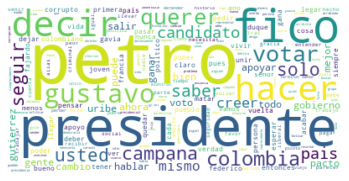

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(unigrams_dict)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
unigrams_di = bow.sum().sort_values(ascending=False)
g = unigrams_di[:10]
b_uni = g.plot.bar()
b_uni.set_ylabel('Frequency')
b_uni.set_title('Ten most words used')

In [ ]:
p_uni = g.plot.pie(autopct='%1.1f%%',explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
p_uni.set_ylabel('')
p_uni.set_title('Ten most uni-words used')

In [ ]:
fre = (unigrams_di.values/np.sum(unigrams_di.values))*100
t_uni = pd.DataFrame({'uni-words':g.index, 'Counts':g.values, 'Frecuency %': np.round(fre[:10],3)})
print('The ten most used uni-words add to {}%'.format(np.round(np.sum(fre[:10]),2)))
t_uni

###Bigrams

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), max_features=300, stop_words=stopwords)
bigrams = vectorizer.fit_transform(final_tweets['final_tweet'])
bigrams = bigrams.toarray()
bow = pd.DataFrame(bigrams, columns = vectorizer.get_feature_names())
bigrams_dict=bow.sum().sort_values(ascending=False).to_dict()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


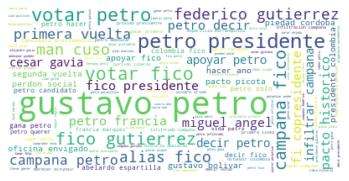

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(bigrams_dict)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
bigrams_di = bow.sum().sort_values(ascending=False)
g = bigrams_di[:10]
b_bi = g.plot.bar()
b_bi.set_ylabel('Frequency')
b_bi.set_title('Ten most bi-words used')

In [ ]:
p_bi = g.plot.pie(autopct='%1.1f%%',explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
p_bi.set_ylabel('')
p_bi.set_title('Ten most bi-words used')

In [ ]:
fre = (bigrams_di.values/np.sum(bigrams_di.values))*100
t_bi = pd.DataFrame({'bi-words':g.index, 'Counts':g.values, 'Frecuency %': np.round(fre[:10],3)})
print('The ten most used bi-words add to {}%'.format(np.round(np.sum(fre[:10]),2)))
t_bi

###Trigrams

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(3, 3), max_features=300, stop_words=stopwords)
trigrams = vectorizer.fit_transform(final_tweets['final_tweet'])
trigrams = trigrams.toarray()
bow = pd.DataFrame(trigrams, columns = vectorizer.get_feature_names())
trigrams_dict=bow.sum().sort_values(ascending=False).to_dict()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


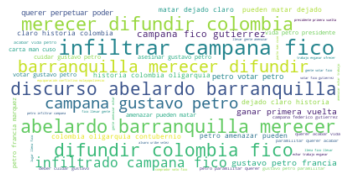

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(trigrams_dict)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
trigrams_di = bow.sum().sort_values(ascending=False)
g = trigrams_di[:10]
b_tri = g.plot.bar()
b_tri.set_ylabel('Frequency')
b_tri.set_title('Ten most tri-words used')

In [ ]:
p_tri = g.plot.pie(autopct='%1.1f%%',explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
p_tri.set_ylabel('')
p_tri.set_title('Ten most tri-words used')

In [ ]:
fre = (trigrams_di.values/np.sum(trigrams_di.values))*100
t_tri = pd.DataFrame({'tri-words':g.index, 'Counts':g.values, 'Frecuency %': np.round(fre[:10],3)})
print('The ten most used tri-words add to {}%'.format(np.round(np.sum(fre[:10]),2)))
t_tri

In [ ]:
trigrams_dict

{'abelardo barranquilla merecer difundir': 485,
 'abogado grave campana petro': 111,
 'abogado pacto historico decir': 130,
 'abogador fiscal pectar petro': 158,
 'acabar decir intelecto suficiente': 244,
 'acabar vida petro presidente': 290,
 'aceptar hablar infiltracion campana': 119,
 'acordar pais gente votar': 187,
 'admitir infiltrar campana federico': 165,
 'advertir permanentemente llegar presidente': 124,
 'ahora salir decir interpretar': 125,
 'alcanzar tiempo exponer todo': 207,
 'almandino decir fico peligro': 236,
 'alombar investigar gustavo petro': 148,
 'amenazar echar trabajo enganar': 278,
 'amenazar pueden matar dejado': 341,
 'angel abogado pacto historico': 130,
 'angel campana petro aceptar': 119,
 'angel decir infiltrar campana': 125,
 'angel equipo petro admitir': 164,
 'ano masacrar bojaya montar': 174,
 'anunciar militar gustavo petro': 138,
 'apoyar clan politico region': 217,
 'apoyar petro paramilitar segun': 174,
 'armando disgustadamente bolivar piedad': 

In [ ]:
text